Before class, thoroughly familiarize yourself with all the examples in the reading. Work your way through the math problems and come to class prepared to discuss any questions and points of confusion.
Also, familiarize yourself with the “experiment()” function available from this Gist page(https://gist.github.com/diamonaj/62965d6c8307c1b77d59b9852007b9c7) and understand how it works. 

Use this code to simulate treatment assignment for the two blocks of units given in Example II-8 (page 68), using the propensity scores as the vector.of.probabilities. We will be using this code in class.
Come to class having run the code on the Gist page, so that the function and the two vectors (relating to income, and relating to # of children) are ready to use on your computer. Explore those two vectors (e.g., identify the minimum and maximum values, and plot their histograms).


In [1]:
storage.vector <- NA

# Function that assigns treatment/control depending on 
# propensity scores (assignment probabilities)
experiment <- function(vector.of.probabilities = NULL) {
  k = 0
  for (i in 1:length(vector.of.probabilities)) {
    if(
      sample(x = c(1,0), size = 1, prob = c(vector.of.probabilities[i], 
                                            1 - vector.of.probabilities[i])) == 1) {
      storage.vector[k] <- i
      k = k + 1
    }
  }
  return(list(treated.units = storage.vector, 
              control.units = (1:(length(vector.of.probabilities)))[-storage.vector]))
}

### Here are two distributions
# Incomes for the female-headed households without children are defined per the following code:
set.seed(123); nokids.income <- round(abs(exp(rnorm(1000, 5, 1))))

# Household sizes for the female-headed households with children are defined per this code:
set.seed(123); kids.hhsize <- round(sqrt(abs(rnorm(1000, 12, 100))) + .3)

In [7]:
experiment(c(.68, .42, .73, .79, .63, .40, .38, .44, .41))

$treated.units
[1] 3 4 5 6

$control.units
[1] 1 2 7 8 9

[1]    9 3793

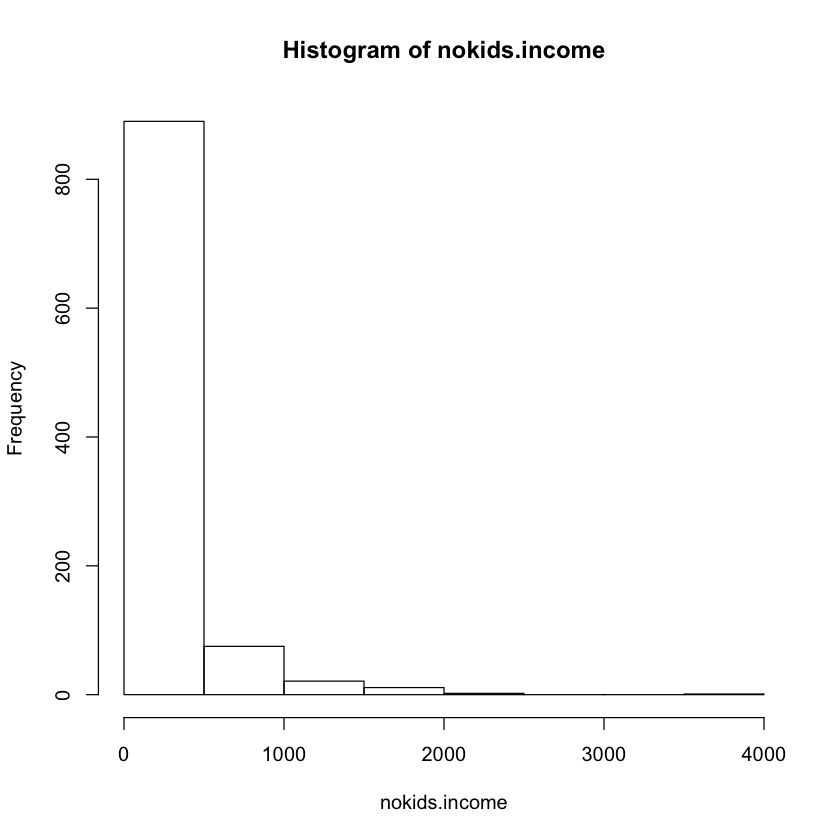

In [4]:
range(nokids.income)
hist(nokids.income)

[1]  0 19

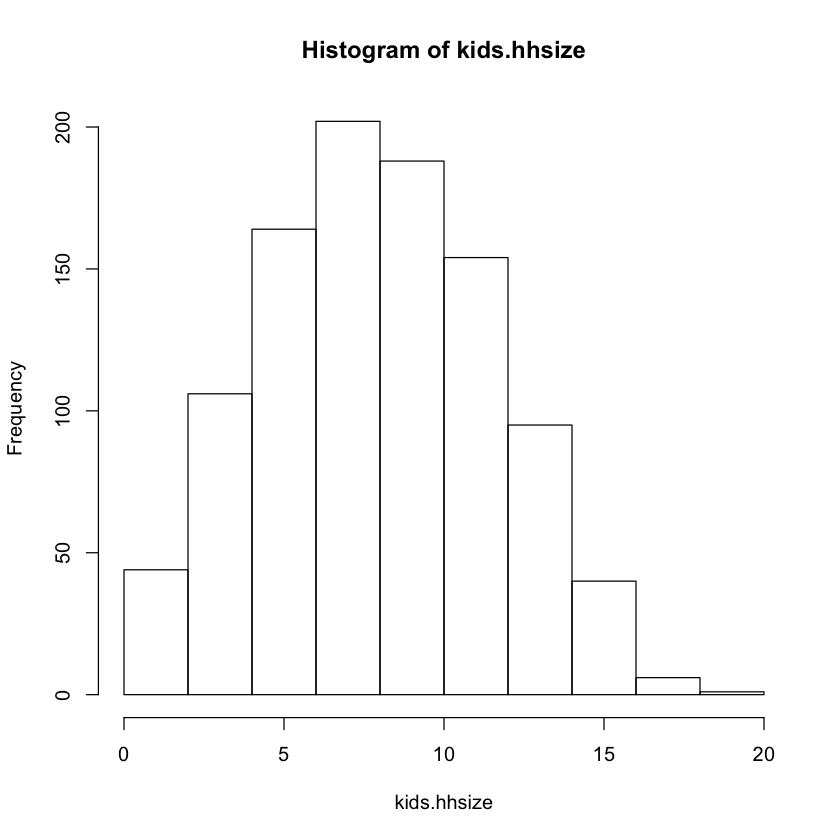

In [5]:
range(kids.hhsize)
hist(kids.hhsize)